In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
pd.set_option('display.max_columns', None) ## 변수 77개... 너무 많은 느낌! 차원 축소 필요

In [3]:
raw = pd.read_csv('./decied_var.csv', index_col=0)
raw.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  age  TotalMntSpent  TotalNumPurchases  Total_Acc_Cmp  \
0         0         1   64           1617                 25              1   
1         0         0   67             27                  6              0   
2         0         0   56            776                 21              0   
3         0         0   37             53                  8              0   
4         0         0   40            422                 19              0   

  Partner  Children  Family_Size  Is_Parent Education_Level  Years_Customer  \
0      No         0            1          0        Graduate               2   
1      No         2            3          1        Graduate               0   
2     Yes         0            2          0        Graduate               1   
3     Yes         1            3          1        Graduate               0   
4     Yes         1            3          1    Postgraduate               0   

   Days_Customer  
0            663  
1            113  
2            312  
3            139  
4            161

# PCA 보충

In [4]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [5]:
# 연속형 변수
cont_var = raw.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',"Complain","Response","Partner","Education_Level",'Is_Parent'])

In [6]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cont_var)
scaled_df = pd.DataFrame(scaler.transform(cont_var))
scaled_df.columns = cont_var.columns
scaled_df

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.314651 -0.823405 -0.930767  0.310830  0.974566   1.548614   
1    -0.254877  1.038757  0.906602 -0.380600 -0.874776  -0.638664   
2     0.965354 -0.823405 -0.930767 -0.795458  0.355155   0.568110   
3    -1.206087  1.038757 -0.930767 -0.795458 -0.874776  -0.563241   
4     0.322136  1.038757 -0.930767  1.555404 -0.394659   0.417263   
...        ...       ...       ...       ...       ...        ...   
2200  0.463624 -0.823405  0.906602 -0.104028  1.193879   0.417263   
2201  0.598401  2.900920  0.906602  0.241687  0.295881  -0.663806   
2202  0.258780 -0.823405 -0.930767  1.451690  1.783653   0.542969   
2203  0.851004 -0.823405  0.906602 -1.417746  0.361082   0.090428   
2204  0.060213  1.038757  0.906602 -0.311457 -0.658427  -0.588382   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            1.748400         2.449154          1.480301      0.849556   
1           -0.731678        -0.652345         -0.635399     -0.735767   
2           -0.175957         1.336263         -0.149031     -0.039771   
3           -0.667380        -0.506392         -0.586763     -0.755100   
4           -0.217292         0.150396         -0.003121     -0.561768   
...               ...              ...               ...           ...   
2200         0.076644         0.077420          2.209853      3.923536   
2201        -0.621452        -0.688833         -0.659718     -0.697100   
2202         0.237389        -0.105022         -0.367897     -0.387769   
2203         0.223611         0.770696          0.069834      0.327560   
2204        -0.479078        -0.652345         -0.635399     -0.445768   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              0.361479         1.424772             2.628526   
1             -0.168834        -1.132957            -0.588043   
2             -0.699147         1.424772            -0.230646   
3             -0.168834        -0.767567            -0.945440   
4              1.422105         0.328602             0.126750   
...                 ...              ...                  ...   
2200          -0.168834         1.790162             0.126750   
2201           2.482731         1.424772            -0.230646   
2202          -0.699147        -0.767567             0.126750   
2203          -0.168834         0.693992             0.841543   
2204           0.361479        -0.402177            -0.588043   

      NumStorePurchases  NumWebVisitsMonth       age  TotalMntSpent  \
0             -0.562650           0.689203  1.017189       1.679323   
1             -1.179732          -0.139645  1.273530      -0.963897   
2              1.288596          -0.554069  0.333612       0.281242   
3             -0.562650           0.274779 -1.289883      -0.920675   
4              0.054432          -0.139645 -1.033542      -0.307248   
...                 ...                ...       ...            ...   
2200          -0.562650          -0.139645  0.162718       1.220500   
2201          -0.254109           0.689203  1.957107      -0.270675   
2202           2.214218           0.274779 -1.033542       1.054260   
2203           1.288596          -0.968493  1.102636       0.392623   
2204          -0.562650           0.689203  1.273530      -0.722849   

      TotalNumPurchases  Total_Acc_Cmp  Children  Family_Size  Years_Customer  \
0              1.328161       0.614920 -1.266589    -1.759012        1.498307   
1             -1.167390      -0.503808  1.403420     0.448513       -1.417639   
2              0.802782      -0.503808 -1.266589    -0.655250        0.040334   
3             -0.904700      -0.503808  0.068415     0.448513       -1.417639   
4              0.540092      -0.503808  0.068415     0.448513       -1.417639   
...                 ...            ...       ...          ...             ...   
2200           0.408747      -0.503808  0.068415     0.448513        0.040334   
2201    

In [7]:
# PCA 적용
pcs = PCA()
pcs.fit(scaled_df.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

PC1     PC2     PC3     PC4     PC5     PC6  \
Standard deviation      2.9578  1.7332  1.4413  1.0955  1.0775  0.9954   
Proportion of variance  0.3802  0.1306  0.0903  0.0522  0.0505  0.0431   
Cumulative proportion   0.3802  0.5107  0.6010  0.6532  0.7036  0.7467   

                           PC7     PC8     PC9    PC10    PC11    PC12  \
Standard deviation      0.9822  0.8490  0.7919  0.7558  0.6853  0.6564   
Proportion of variance  0.0419  0.0313  0.0273  0.0248  0.0204  0.0187   
Cumulative proportion   0.7886  0.8199  0.8472  0.8720  0.8924  0.9111   

                          PC13    PC14    PC15    PC16    PC17    PC18  \
Standard deviation      0.6348  0.6159  0.5788  0.5281  0.4794  0.4389   
Proportion of variance  0.0175  0.0165  0.0146  0.0121  0.0100  0.0084   
Cumulative proportion   0.9287  0.9451  0.9597  0.9718  0.9818  0.9902   

                          PC19    PC20  PC21  PC22  PC23  
Standard deviation      0.3722  0.2957   0.0   0.0   0.0  
Proportion of variance  0.0060  0.0038   0.0   0.0   0.0  
Cumulative proportion   0.9962  1.0000   1.0   1.0   1.0

In [8]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pcs.explained_variance_, '기여율':pcs.explained_variance_ratio_})
result['누적기여율'] = result['기여율'].cumsum()
result.head()

설명가능한 분산 비율(고윳값)       기여율     누적기여율
0          8.748467  0.380196  0.380196
1          3.004016  0.130550  0.510746
2          2.077238  0.090274  0.601020
3          1.200074  0.052153  0.653173
4          1.160960  0.050454  0.703627

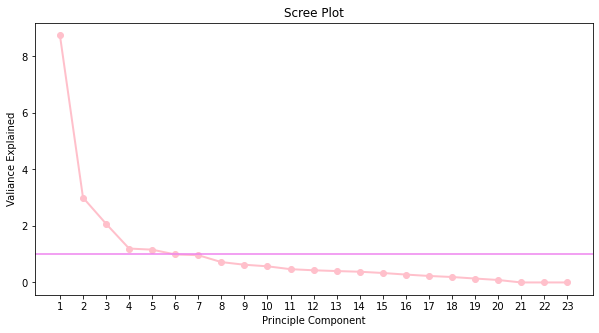

In [9]:
# scree plot - 고유값

PC_values = np.arange(pcs.n_components_)+1
plt.figure(figsize=(10,5))
plt.plot(PC_values, result['설명가능한 분산 비율(고윳값)'], 'o-', linewidth=2, color='pink')
plt.title("Scree Plot")
plt.xlabel("Principle Component")
plt.xticks(np.arange(pcs.n_components_)+1)
plt.ylabel("Valiance Explained")
plt.axhline(1, color='violet')

plt.show()

PC4에서 급격한 하강이 멈춤 -> 4개 성분 적당

민영님 코드 중
- Kaiser's Rule
: PCA().fit(your data)을 통해 데이터의 차원 축소를 수행한 뒤, .explainedvariance 속성을 이용하여 각 주성분의 고유값(eigen value)을 알 수 있습니다. 카이저 규칙은, 고유값이 1을 초과하는 주성분들만 선택하는 방식인데, 요인의 수를 고려하지 않는 지나치게 엄격한 관습적인 방법으로 인해 1번과 3번의 방법과 함께 참고로만 사용하는 것을 권장하고 있습니다.

에 따르면 6or7이 적당

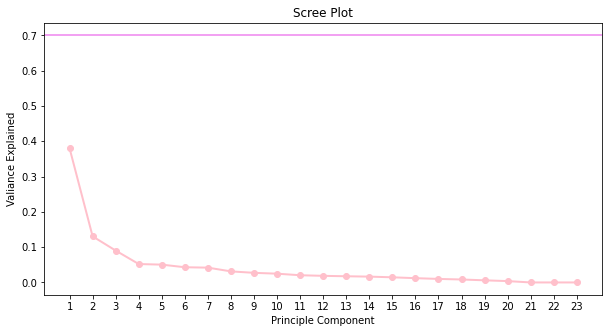

In [10]:
# scree plot - 각 성분이 차지하는 분산. 즉, 설명력(기여율)
PC_values = np.arange(pcs.n_components_)+1
plt.figure(figsize=(10,5))
plt.plot(PC_values, result['기여율'], 'o-', linewidth=2, color='pink')
plt.title("Scree Plot")
plt.xlabel("Principle Component")
plt.xticks(np.arange(pcs.n_components_)+1)
plt.ylabel("Valiance Explained")
plt.axhline(0.70, color='violet')

plt.show()

민영님 코드 중
 - 분산비율 선택법
    : 전체 데이터에서 최소 70% 이상의 설명력을 가지는 주성분 갯수를 선택하는 방법입니다.

해당하지 않음. PC1도 0.4 이하 -> 데이터가 굉장히 각 차원마다 분산되어 있는 것 같음. so, 되도록이면 변수 좀 많이 가져가는 것도 좋을 듯 함

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [23] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[23]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


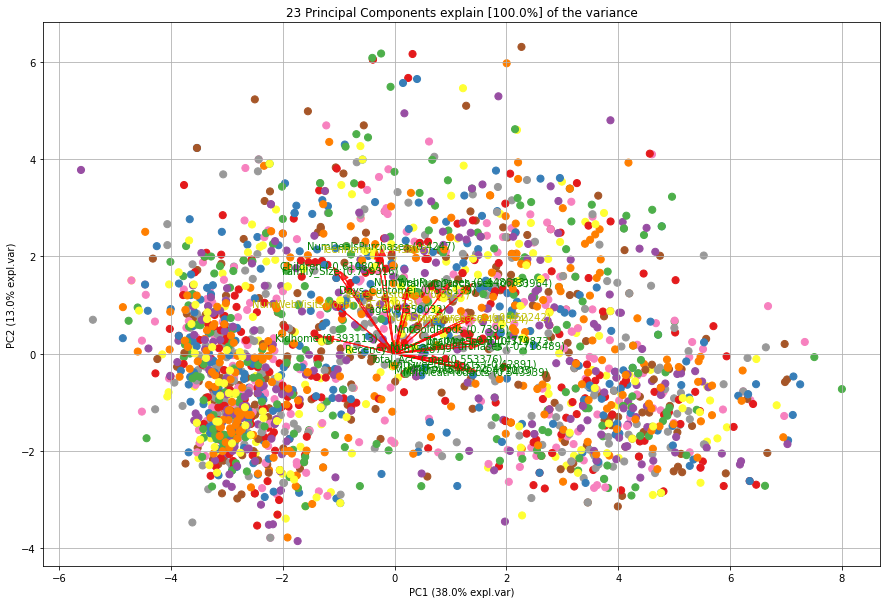

In [68]:
# biplot

from sklearn.decomposition import PCA
from pca import pca # biplot을 그리기 위한 별도 라이브러리
import seaborn as sns

pcs = PCA(n_components=2)
pca_array = pcs.fit_transform(data)
pca_df = pd.DataFrame(pca_array, index=data.index,
                      columns=['pca1','pca2'])
                      
model = pca(n_components=23)
results = model.fit_transform(data)
fig, ax = model.biplot(n_feat=23, legend=False, label=None)
 

**biplot 해석법**  

Biplot은 PCA분석에서 찾은 주성분 (PC1과 PC2) 과 원데이터의 변수간의 상관 관계를 보여주는 그래프입니다. Biplot을 해석하는 방법은 아래와 같습니다.

(1) 각 PC축에 가깝게 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수. **--> PC1에 대해선 다양한 Mnt 변수들과 Total_Acc_Cmp,Income,NumDealsPurchases**

<span style='background-color:#fffb51'>PC1이 전체분산에서 38%을 차지하니까 (가장 잘 대표하니까) PC1에 영향을 많이 준 Mnt변수와 Total_Acc_Cmp가 고객들의 성향을 잘 보일 수 있는 주요변수라고 볼 수 있나?</span>

(2) 각 빨간선의 길이는 원변수의 분산을 표현, 길이가 길수록 분산이 길다. **--> 대부분 비슷한 길이를 보임. 다들 동등한 분산 가짐**

(3) 각 빨간선이 가까울수록 서로 상관관계가 있다. (반대로 서로 거리가 멀수록 상관관계가 적다.) **--> 두세개쯤 비슷할 뿐이고 전체적으로 다들 좀 분산됨**

<span style='background-color:#fffb51'>그래서 PC1이 차지하는 분산이 많이 크지 않고 비교적 다들 동등하게 가져간듯.. 다들 분산 되어 있어서</span>

(4) **크게 3개의 군집이 확인됨.** 

In [11]:
# PC1-3에 대한 3차원 산점도 - Partner유뮤

import plotly.express as px

components = pcs.transform(scaled_df)

total_var = pcs.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0,y=1,z=2,
                   title=f'Total Explained Variance:{total_var:.2f}%',
                   labels={'0':'PC1','1':'PC2','2':'PC3'},
                   opacity=0.2,
                   color=raw['Partner'])
fig.update_traces(marker_size = 4)
fig.show()

In [12]:
# PC1-3에 대한 3차원 산점도 - 학력

import plotly.express as px

components = pcs.transform(scaled_df)

total_var = pcs.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0,y=1,z=2,
                   title=f'Total Explained Variance:{total_var:.2f}%',
                   labels={'0':'PC1','1':'PC2','2':'PC3'},
                   opacity=0.2,
                   color=raw['Education_Level'])
fig.update_traces(marker_size = 4)
fig.show()

In [13]:
# PC1-3에 대한 3차원 산점도 - Is_Parent (부모인지 유무)

import plotly.express as px

components = pcs.transform(scaled_df)

total_var = pcs.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0,y=1,z=2,
                   title=f'Total Explained Variance:{total_var:.2f}%',
                   labels={'0':'PC1','1':'PC2','2':'PC3'},
                   opacity=0.2,
                   color=raw['Is_Parent'])
fig.update_traces(marker_size = 4)
fig.show()

In [14]:
# 7개의 성분으로 결정

principalComponents = pd.DataFrame(components, columns = ['PC{}'.format(i) for i in range(1, 24)])
principalComponents

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     5.017382  0.433975  2.516828  0.372119 -0.510448  0.133593 -0.270658   
1    -3.185343 -0.377166 -2.317641 -0.192407 -0.204889  0.288746 -0.976081   
2     2.301576 -0.661802 -0.053295 -0.528482 -0.531312 -1.549286  0.269837   
3    -2.969388 -1.761043 -0.520207  0.557967  1.220958 -0.929747  0.411521   
4    -0.422384 -0.161255 -1.016439  1.829770  0.762308  0.188840  2.198599   
...        ...       ...       ...       ...       ...       ...       ...   
2200  2.615396  1.530662 -0.265331  0.695552 -0.431956 -0.859261  0.165003   
2201 -2.233513  3.906213 -3.382701  0.594271  2.232144  0.838756  0.415927   
2202  2.258172 -1.933692 -0.381626 -0.767510  0.616714  0.772707  2.337221   
2203  1.921975  0.606138 -2.660681 -0.537717 -0.179794 -1.432360 -0.574673   
2204 -2.353799  2.226211  0.688021 -0.333971 -0.144804  1.031601 -1.846853   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     1.289351  2.128205  0.224238  0.155748 -0.206060  1.551058  0.368351   
1     0.416325  0.517501  0.380920 -0.014731  0.030853  0.013195  0.209254   
2    -0.614495  0.249706 -0.395949 -1.328496  0.031797 -0.084376 -1.138820   
3    -0.392569 -0.030580  0.142091 -0.201143  0.049950  0.009783 -0.101652   
4    -0.500296  0.835517  0.313513  0.201162 -0.187980 -0.203769 -0.132316   
...        ...       ...       ...       ...       ...       ...       ...   
2200  2.952076 -1.445449 -0.970002 -0.619845  1.263822  0.150136  1.614977   
2201  0.340723  2.181833  0.545371 -0.999534  0.423980 -0.543881 -0.047888   
2202 -1.170003 -0.317700 -0.166233  0.002142 -1.281395 -0.758228 -0.965961   
2203 -0.257487 -0.133771  0.334849 -0.395946  0.204962  0.271557 -0.392951   
2204  0.171329  0.244662  0.117235 -0.205433  0.204942 -0.495697 -0.155824   

          PC15      PC16      PC17      PC18      PC19      PC20  \
0     0.464331 -0.806048 -0.087025 -0.492849  0.179913  0.069216   
1    -0.030856  0.047330 -0.251180 -0.715272 -0.015794 -0.187578   
2     0.509448  0.216386 -0.296058  0.340958 -0.363926  0.147879   
3    -0.181492 -0.117515  0.077458  0.368835  0.233137 -0.248523   
4     0.558544 -0.021927 -0.413165  0.274700 -0.546461 -0.326878   
...        ...       ...       ...       ...       ...       ...   
2200 -1.132304  0.293852 -0.764883  0.453568  0.388789 -0.073940   
2201  0.551886  0.169234 -0.409862  0.042027 -0.298419  0.234353   
2202 -1.682409 -0.470675  0.259682 -0.512100  0.209133 -0.233670   
2203  0.060087 -0.430692  0.327972  0.150856  0.041883 -0.291407   
2204  0.472134  0.205180  0.264499  0.061986 -0.497107  0.102236   

              PC21          PC22          PC23  
0    -1.334790e-16  8.078567e-16 -4.899733e-16  
1     2.497754e-16 -2.721452e-16 -4.584649e-17  
2    -1.366711e-16 -1.933087e-16  2.421831e-16  
3     1.726211e-16  4.772619e-17 -3.994073e-17  
4    -2.913760e-16 -4.118791e-16  1.871011e-16  
...            ...           ...           ...  
2200  5.947552e-16  1.405842e-16  1.984082e-16  
2201 -3.054406e-16 -3.552663e-16 -4.636495e-16  
2202 -4.475979e-16  8.537523e-17  6.377007e-16  
2203  2.157453e-16  9.176015e-17  1.304542e-16  
2204  1.568654e-16 -2.611740e-16 -2.335405e-16  

[2205 rows x 23 columns]

In [15]:
cate_var = raw[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',"Complain","Response","Partner","Education_Level",'Is_Parent']]
cate_var = cate_var.reset_index()
final_df = pd.concat([cate_var, principalComponents.iloc[:,:7]], axis=1).drop(columns=['index'])
final_df

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2200             0             0             0             0             0   
2201             1             0             0             0             0   
2202             0             0             0             1             0   
2203             0             0             0             0             0   
2204             0             0             0             0             0   

      Complain  Response Partner Education_Level  Is_Parent       PC1  \
0            0         1      No        Graduate          0  5.017382   
1            0         0      No        Graduate          1 -3.185343   
2            0         0     Yes        Graduate          0  2.301576   
3            0         0     Yes        Graduate          1 -2.969388   
4            0         0     Yes    Postgraduate          1 -0.422384   
...        ...       ...     ...             ...        ...       ...   
2200         0         0     Yes        Graduate          1  2.615396   
2201         0         0     Yes    Postgraduate          1 -2.233513   
2202         0         0      No        Graduate          0  2.258172   
2203         0         0     Yes    Postgraduate          1  1.921975   
2204         0         1     Yes    Postgraduate          1 -2.353799   

           PC2       PC3       PC4       PC5       PC6       PC7  
0     0.433975  2.516828  0.372119 -0.510448  0.133593 -0.270658  
1    -0.377166 -2.317641 -0.192407 -0.204889  0.288746 -0.976081  
2    -0.661802 -0.053295 -0.528482 -0.531312 -1.549286  0.269837  
3    -1.761043 -0.520207  0.557967  1.220958 -0.929747  0.411521  
4    -0.161255 -1.016439  1.829770  0.762308  0.188840  2.198599  
...        ...       ...       ...       ...       ...       ...  
2200  1.530662 -0.265331  0.695552 -0.431956 -0.859261  0.165003  
2201  3.906213 -3.382701  0.594271  2.232144  0.838756  0.415927  
2202 -1.933692 -0.381626 -0.767510  0.616714  0.772707  2.337221  
2203  0.606138 -2.660681 -0.537717 -0.179794 -1.432360 -0.574673  
2204  2.226211  0.688021 -0.333971 -0.144804  1.031601 -1.846853  

[2205 rows x 17 columns]

# Clusturing

## K-Means

In [16]:
# creating dummies

dums = pd.get_dummies(final_df, drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(dums, train_size = 0.6, random_state=1)
vaild_df, test_df = train_test_split(valid_df, train_size=0.6, random_state=1)

## deciding the best k : elbow method
reference : https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb  
엘보우 기법 : 각 k개의 군집으로 구한 k-means결과의 WSS거리가 가장 짧은 k를 구한다.  
WSS(Within-Cluster-Sum of Squared) : 군집의 중심점에서 각 군집에 속한 데이터들의 거리. 를 다 합친 것.  SSE랑 비슷함

In [22]:
from sklearn.cluster import KMeans
def calculate_WSS(points, kmax):
    from scipy.spatial import distance
    sse = []
    for k in range(1, kmax+1): # 각 k마다 밑의 과정들을 통해서 sse(wss)를 구함
        kmeans = KMeans(n_clusters = k).fit(points) # points : 데이터셋을 넣으면 됨
        centroids = kmeans.cluster_centers_ # 각 군집의 중심점
        pred_cluster = kmeans.predict(points) # 군집 결과 (라벨)
        curr_sse = 0
        
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)): # 모든 데이터를
            curr_center = centroids[pred_cluster[i]] 
            
            # 각 데이터마다 그 데이터가 속한 군집의 중심점과의 거리를 구하는거임 (점과 점 사이의 거리:유클리드 거리 <-> sse)
            #curr_sse += (points[i,0] - curr_center[0]) ** 2 + (points[i-1] - curr_center[1]) ** 2
            curr_sse += (distance.euclidean(points.iloc[i].values, curr_center))**2 # 위에 코드는 2차원 전용이고, 그냥 유클리드 함수 쓰기
        
        sse.append(curr_sse) # 다 더한 최종 sse. 즉, wss
        
    return sse

Text(0, 0.5, 'WSS')

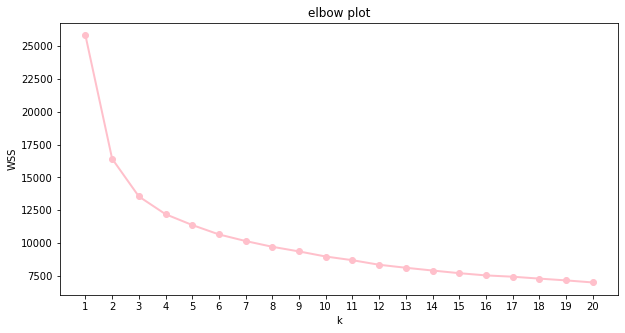

In [23]:
plt.figure(figsize=(10,5))
elb_df = pd.DataFrame(calculate_WSS(train_df, 20),index=np.arange(20)+1)
plt.plot(elb_df, 'o-', linewidth=2, color='pink')
plt.title("elbow plot")
plt.xlabel("k")
plt.xticks(np.arange(20)+1)
plt.ylabel("WSS")

<span style='background-color:#fffb51'>꺾이는 부분이 명확하지 않음 --> 실루엣 기법 고고</span>

## deciding the best k : Silhouette method
The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

실루엣 값의 범위는 +1에서 -1 사이입니다. 높은 값이 바람직하며 점이 올바른 군집에 배치되었음을 나타냅니다.  
많은 점의 실루엣 값이 음수이면 군집이 너무 많거나 너무 적다는 의미일 수 있습니다.

In [24]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(train_df)
  labels = kmeans.labels_
  sil.append(silhouette_score(train_df, labels, metric = 'euclidean'))

In [25]:
sil_df = pd.DataFrame(sil,index=np.arange(19)+2)

Text(0, 0.5, 'silhouette score')

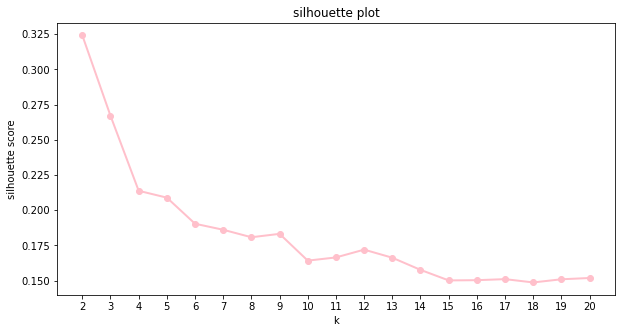

In [26]:
plt.figure(figsize=(10,5))
plt.plot(sil_df, 'o-', linewidth=2, color='pink')
plt.title("silhouette plot")
plt.xlabel("k")
plt.xticks(np.arange(19)+2)
plt.ylabel("silhouette score")

<span style='background-color:#fffb51'>k=2일 때 최적임..음...최대 k=3임. 4부터는 너무 점수가 낮아짐</span>

## K-means Clusturing ; k=3

In [27]:
from sklearn.cluster import KMeans
 
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(train_df)

k_means_labels = k_means.labels_
print('k_means_labels : ', k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
print('k_means_cluster_centers : ', k_means_cluster_centers)



k_means_labels :  [1 0 2 ... 0 2 2]
k_means_cluster_centers :  [[ 1.62337662e-03  1.62337662e-03  8.11688312e-02  1.29870130e-02
  -2.77555756e-17  1.29870130e-02  8.60389610e-02  8.70129870e-01
  -2.63757635e+00 -6.56539873e-01  9.33734556e-02  5.43281070e-02
   2.37791955e-02  1.09793390e-01 -6.22388517e-02  6.42857143e-01
   3.75000000e-01  1.54220779e-01]
 [ 2.10059172e-01  3.25443787e-02  7.39644970e-02  1.42011834e-01
   2.60355030e-01  5.91715976e-03  3.01775148e-01  1.44970414e-01
   4.04239544e+00 -9.20971808e-01  1.11245357e-01  2.67708004e-01
   9.13262452e-02  2.08070748e-01 -2.34299020e-01  5.94674556e-01
   3.63905325e-01  9.17159763e-02]
 [ 3.25203252e-02  8.13008130e-03  7.04607046e-02  1.19241192e-01
   2.16802168e-02  8.13008130e-03  1.19241192e-01  9.59349593e-01
   7.69997852e-01  1.86349182e+00 -1.87692677e-01 -3.45808752e-01
  -1.31242338e-01 -3.32228288e-01  3.20889943e-01  6.58536585e-01
   4.44444444e-01  5.42005420e-02]]


In [28]:
train_df['label'] = k_means.labels_
train_df.head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
198              0             0             0             0             0   
2103             0             0             1             0             0   
460              0             0             0             0             0   
957              0             0             0             0             0   
159              0             0             0             0             0   

      Complain  Response  Is_Parent       PC1       PC2       PC3       PC4  \
198          0         0          0  3.002553 -1.753059 -2.147360 -0.744387   
2103         0         0          1 -1.908371  1.380654 -0.536292  0.050569   
460          0         0          1 -0.409285 -0.073466 -2.122517 -1.142791   
957          0         0          1 -2.429214  3.994264 -1.500067  1.888137   
159          0         0          1 -3.045898 -0.978222  1.100303  0.863198   

           PC5       PC6       PC7  Partner_Yes  Education_Level_Postgraduate  \
198  -0.266796 -0.670491 -0.472227            1                             0   
2103  1.217058 -0.004336 -0.444834            0                             0   
460   0.617959 -1.324943  0.711741            1                             1   
957   1.585123  0.648169  0.257271            1                             1   
159   0.166443  0.514319  0.925019            1                             0   

      Education_Level_Undergraduate  label  
198                               0      1  
2103                              0      0  
460                               0      2  
957                               0      2  
159                               0      0

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



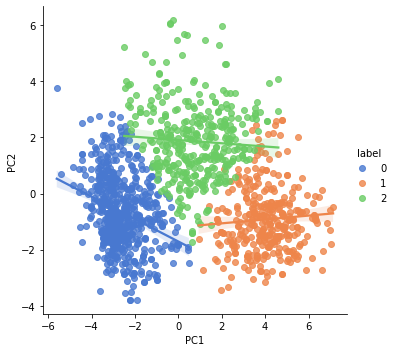

In [29]:
sns.set_palette("muted")
sns.lmplot('PC1','PC2',data=train_df,hue='label')

In [30]:
fig = px.scatter_3d(train_df, x='PC1',y='PC2',z='PC3',
                   labels={'0':'PC1','1':'PC2','2':'PC3'},
                   opacity=0.2,
                   color=train_df['label'])
fig.update_traces(marker_size = 4)
fig.show()

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



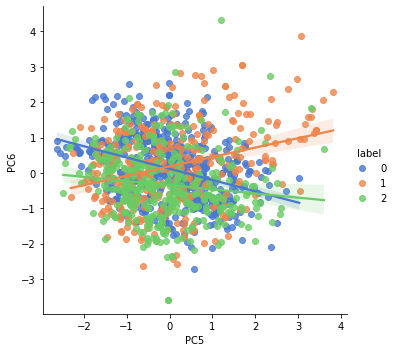

In [32]:
sns.set_palette("muted")
sns.lmplot('PC5','PC6',data=train_df,hue='label')

In [ ]:
# 주성분분석으로 차원축소 시킨 변수들은 예측 결과의 해석이 어려움...
# 어차피 엄청난 시간이 필요한 것도 아니니까 차원 축소 전의 데이터로도 해봐도 괜찮을 거 같음!

# K-means clusturing - pca 전

In [33]:
cate_var = raw[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',"Complain","Response","Partner","Education_Level",'Is_Parent']]
cate_var = cate_var.reset_index()
no_pca = pd.concat([cate_var, scaled_df], axis=1).drop(columns=['index'])
no_pca.head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response Partner Education_Level  Is_Parent    Income   Kidhome  \
0         0         1      No        Graduate          0  0.314651 -0.823405   
1         0         0      No        Graduate          1 -0.254877  1.038757   
2         0         0     Yes        Graduate          0  0.965354 -0.823405   
3         0         0     Yes        Graduate          1 -1.206087  1.038757   
4         0         0     Yes    Postgraduate          1  0.322136  1.038757   

   Teenhome   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 -0.930767  0.310830  0.974566   1.548614         1.748400         2.449154   
1  0.906602 -0.380600 -0.874776  -0.638664        -0.731678        -0.652345   
2 -0.930767 -0.795458  0.355155   0.568110        -0.175957         1.336263   
3 -0.930767 -0.795458 -0.874776  -0.563241        -0.667380        -0.506392   
4 -0.930767  1.555404 -0.394659   0.417263        -0.217292         0.150396   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.480301      0.849556           0.361479         1.424772   
1         -0.635399     -0.735767          -0.168834        -1.132957   
2         -0.149031     -0.039771          -0.699147         1.424772   
3         -0.586763     -0.755100          -0.168834        -0.767567   
4         -0.003121     -0.561768           1.422105         0.328602   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       age  \
0             2.628526          -0.562650           0.689203  1.017189   
1            -0.588043          -1.179732          -0.139645  1.273530   
2            -0.230646           1.288596          -0.554069  0.333612   
3            -0.945440          -0.562650           0.274779 -1.289883   
4             0.126750           0.054432          -0.139645 -1.033542   

   TotalMntSpent  TotalNumPurchases  Total_Acc_Cmp  Children  Family_Size  \
0       1.679323           1.328161       0.614920 -1.266589    -1.759012   
1      -0.963897          -1.167390      -0.503808  1.403420     0.448513   
2       0.281242           0.802782      -0.503808 -1.266589    -0.655250   
3      -0.920675          -0.904700      -0.503808  0.068415     0.448513   
4      -0.307248           0.540092      -0.503808  0.068415     0.448513   

   Years_Customer  Days_Customer  
0        1.498307       1.527183  
1       -1.417639      -1.188629  
2        0.040334      -0.205999  
3       -1.417639      -1.060245  
4       -1.417639      -0.951612

In [34]:
dums = pd.get_dummies(no_pca, drop_first=True)

#train_df, valid_df = train_test_split(dums, train_size = 0.6, random_state=1)
#vaild_df, test_df = train_test_split(valid_df, train_size=0.6, random_state=1)

In [199]:
#train_df.head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
198              0             0             0             0             0   
2103             0             0             1             0             0   
460              0             0             0             0             0   
957              0             0             0             0             0   
159              0             0             0             0             0   

      Complain  Response  Is_Parent    Income   Kidhome  Teenhome   Recency  \
198          0         0          0  1.272428 -0.823405 -0.930767 -1.072030   
2103         0         0          1 -0.532736  1.038757  0.906602 -0.657172   
460          0         0          1  0.203778 -0.823405  0.906602 -1.037459   
957          0         0          1  0.257862  2.900920  0.906602  0.379973   
159          0         0          1 -1.106031  1.038757 -0.930767  1.002260   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
198   0.909365  -0.110701         0.705848        -0.086777          1.820758   
2103 -0.450969  -0.663806        -0.529598        -0.579368         -0.392215   
460   0.429247  -0.663806        -0.580118        -0.688833         -0.562444   
957  -0.041980  -0.588382        -0.405594        -0.506392         -0.586763   
159  -0.871813  -0.563241        -0.731678        -0.488148         -0.465171   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
198      -0.619767          -0.699147        -0.036788             1.198940   
2103     -0.136437           1.422105        -0.402177             0.484147   
460      -0.387769          -0.699147         1.059382            -0.588043   
957      -0.349102           2.482731         0.693992             0.126750   
159      -0.542435          -0.168834        -0.767567            -0.945440   

      NumStorePurchases  NumWebVisitsMonth       age  TotalMntSpent  \
198            0.980055          -1.797341  1.273530       0.821523   
2103          -0.871191           0.274779 -0.008177      -0.579882   
460            0.671514          -0.139645 -0.691753      -0.147658   
957           -0.254109           0.689203  0.333612      -0.325535   
159           -0.871191           1.103627 -1.118989      -0.914025   

      TotalNumPurchases  Total_Acc_Cmp  Children  Family_Size  Years_Customer  \
198            0.671437      -0.503808 -1.266589    -0.655250       -1.417639   
2103           0.014713       0.614920  1.403420     0.448513        0.040334   
460            0.277403      -0.503808  0.068415     0.448513       -1.417639   
957            0.802782      -0.503808  2.738424     2.656038        0.040334   
159           -1.036045      -0.503808  0.068415     0.448513        0.040334   

      Days_Customer  Partner_Yes  Education_Level_Postgraduate  \
198       -1.238007            1                             0   
2103      -0.413388            0                             0   
460       -1.563905            1                             1   
957       -0.457828            1                             1   
159       -0.013423            1                             0   

      Education_Level_Undergraduate  
198                               0  
2103                              0  
460                               0  
957                               0  
159                               0

Text(0, 0.5, 'WSS')

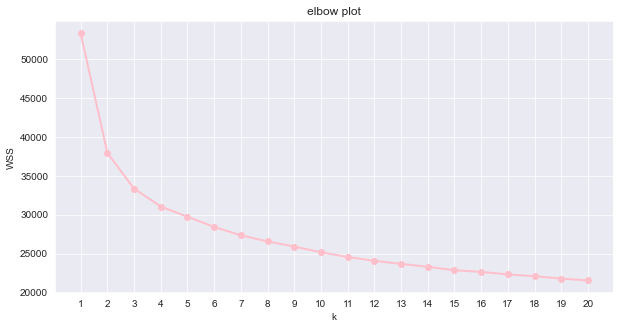

In [120]:
plt.figure(figsize=(10,5))
elb_df = pd.DataFrame(calculate_WSS(dums, 20),index=np.arange(20)+1)
plt.plot(elb_df, 'o-', linewidth=2, color='pink')
plt.title("elbow plot")
plt.xlabel("k")
plt.xticks(np.arange(20)+1)
plt.ylabel("WSS")

In [121]:
sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(dums)
  labels = kmeans.labels_
  sil.append(silhouette_score(dums, labels, metric = 'euclidean'))

sil_df = pd.DataFrame(sil,index=np.arange(19)+2)

Text(0, 0.5, 'silhouette score')

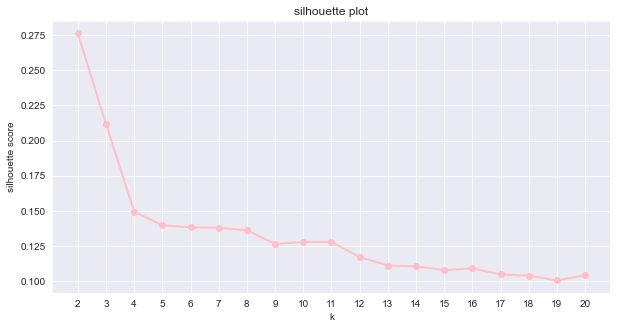

In [122]:
plt.figure(figsize=(10,5))
plt.plot(sil_df, 'o-', linewidth=2, color='pink')
plt.title("silhouette plot")
plt.xlabel("k")
plt.xticks(np.arange(19)+2)
plt.ylabel("silhouette score")

<span style='background-color:#fffb51'>이 또한 K=2일 때 최적, 최소 k=3이여야 함</span>

In [123]:
from sklearn.cluster import KMeans
 
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(dums)

k_means_labels = k_means.labels_
print('k_means_labels : ', k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
print('k_means_cluster_centers : ', k_means_cluster_centers)



k_means_labels :  [2 0 2 ... 2 1 0]
k_means_cluster_centers :  [[ 9.77517107e-04  1.95503421e-03  7.42913001e-02  1.27077224e-02
   1.80411242e-16  1.17302053e-02  8.79765396e-02  8.76832845e-01
  -8.24439235e-01  6.32831334e-01 -9.91913413e-02  6.95218873e-03
  -7.82586061e-01 -5.39992312e-01 -6.55110053e-01 -5.62658099e-01
  -5.37032264e-01 -5.53905937e-01 -1.54837803e-01 -7.31492585e-01
  -7.47351703e-01 -8.00917076e-01  4.57076959e-01 -2.29687549e-01
  -8.47412267e-01 -9.16897689e-01 -3.04777316e-01  3.81612751e-01
   3.15802597e-01 -1.72019898e-01 -1.81594198e-01  6.45161290e-01
   3.53861193e-01  1.57380254e-01]
 [ 3.30708661e-02  1.25984252e-02  6.29921260e-02  1.24409449e-01
   1.88976378e-02  7.87401575e-03  1.19685039e-01  9.57480315e-01
   3.26655361e-01 -3.60063945e-01  7.99542550e-01 -1.94776245e-02
   4.56498968e-01  1.30252477e-02 -9.17110264e-02 -6.72979000e-02
  -1.92440384e-02  3.58980013e-01  7.83223595e-01  8.55108927e-01
   1.90912699e-01  6.07376128e-01  1.7100990

In [124]:
dums['label'] = k_means.labels_
dums.head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Response  Is_Parent    Income   Kidhome  Teenhome   Recency  \
0         0         1          0  0.314651 -0.823405 -0.930767  0.310830   
1         0         0          1 -0.254877  1.038757  0.906602 -0.380600   
2         0         0          0  0.965354 -0.823405 -0.930767 -0.795458   
3         0         0          1 -1.206087  1.038757 -0.930767 -0.795458   
4         0         0          1  0.322136  1.038757 -0.930767  1.555404   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  0.974566   1.548614         1.748400         2.449154          1.480301   
1 -0.874776  -0.638664        -0.731678        -0.652345         -0.635399   
2  0.355155   0.568110        -0.175957         1.336263         -0.149031   
3 -0.874776  -0.563241        -0.667380        -0.506392         -0.586763   
4 -0.394659   0.417263        -0.217292         0.150396         -0.003121   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      0.849556           0.361479         1.424772             2.628526   
1     -0.735767          -0.168834        -1.132957            -0.588043   
2     -0.039771          -0.699147         1.424772            -0.230646   
3     -0.755100          -0.168834        -0.767567            -0.945440   
4     -0.561768           1.422105         0.328602             0.126750   

   NumStorePurchases  NumWebVisitsMonth       age  TotalMntSpent  \
0          -0.562650           0.689203  1.017189       1.679323   
1          -1.179732          -0.139645  1.273530      -0.963897   
2           1.288596          -0.554069  0.333612       0.281242   
3          -0.562650           0.274779 -1.289883      -0.920675   
4           0.054432          -0.139645 -1.033542      -0.307248   

   TotalNumPurchases  Total_Acc_Cmp  Children  Family_Size  Years_Customer  \
0           1.328161       0.614920 -1.266589    -1.759012        1.498307   
1          -1.167390      -0.503808  1.403420     0.448513       -1.417639   
2           0.802782      -0.503808 -1.266589    -0.655250        0.040334   
3          -0.904700      -0.503808  0.068415     0.448513       -1.417639   
4           0.540092      -0.503808  0.068415     0.448513       -1.417639   

   Days_Customer  Partner_Yes  Education_Level_Postgraduate  \
0       1.527183            0                             0   
1      -1.188629            0                             0   
2      -0.205999            1                             0   
3      -1.060245            1                             0   
4      -0.951612            1                             1   

   Education_Level_Undergraduate  label  
0                              0      2  
1                              0      0  
2                              0      2  
3                              0      0  
4                              0      1

### 1차원 분석

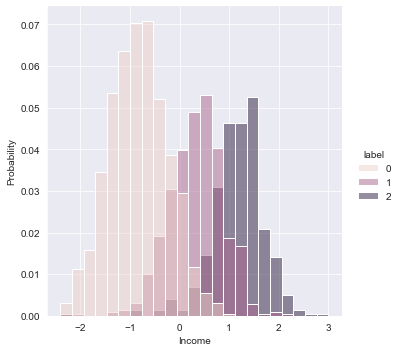

In [125]:
# Income에 따른 클래스 분포
sns.set_style("darkgrid")
sns.displot(dums, x="Income", hue="label", stat="probability")


<span style='background-color:#fffb51'>Income만 봤을 때, 저소득층:0, 중산층:1, 고소득층:2 이긴 한데, 겹치는 부분 꽤 있음. </span>  

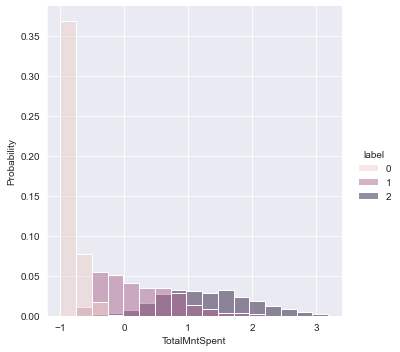

In [127]:
sns.set_style("darkgrid")
sns.displot(dums, x="TotalMntSpent", hue="label", stat="probability")


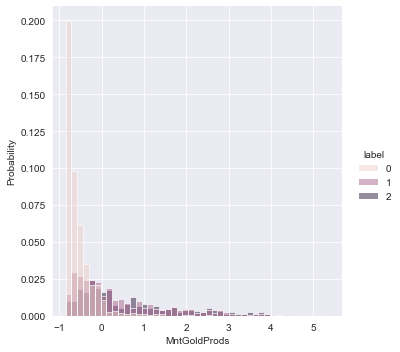

In [146]:
sns.set_style("darkgrid")
sns.displot(dums, x="MntGoldProds", hue="label", stat="probability")


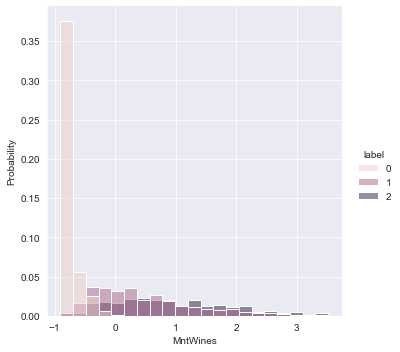

In [147]:
sns.set_style("darkgrid")
sns.displot(dums, x="MntWines", hue="label", stat="probability")


<span style='background-color:#fffb51'>저소득층이었던 0이 확연하게 제품들을 적게 구매함.
1,2는 비슷비슷하지만 고소득층인 2가 더 많이 구매하는 경향</span>  

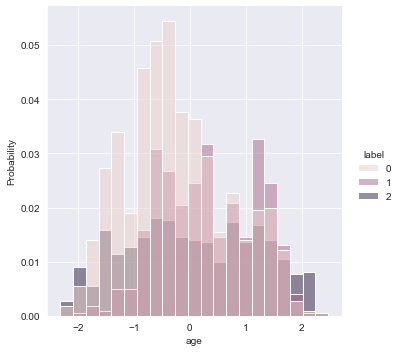

In [126]:
sns.set_palette("RdBu")
sns.set_style("darkgrid")
sns.displot(dums, x="age", hue="label", stat="probability")


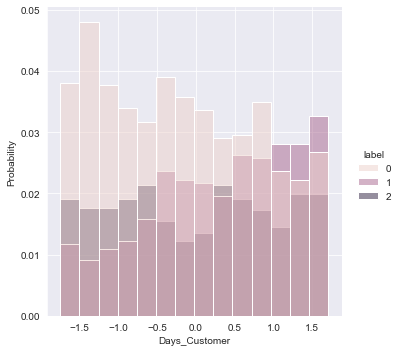

In [128]:
sns.set_style("darkgrid")
sns.displot(dums, x="Days_Customer", hue="label", stat="probability")


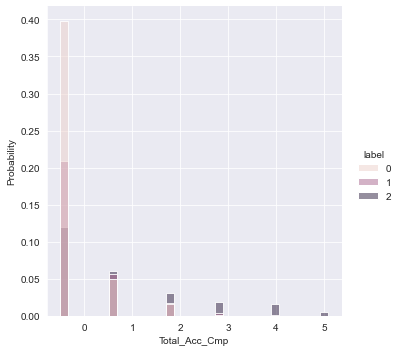

In [129]:
sns.set_style("darkgrid")
sns.displot(dums, x="Total_Acc_Cmp", hue="label", stat="probability")


<span style='background-color:#fffb51'>잘 구별이 안 됨</span>  

### 2차원 분석

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



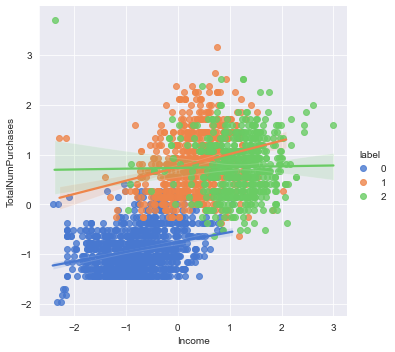

In [130]:
sns.set_palette("muted")
sns.lmplot('Income','TotalNumPurchases',data=dums,hue='label')

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



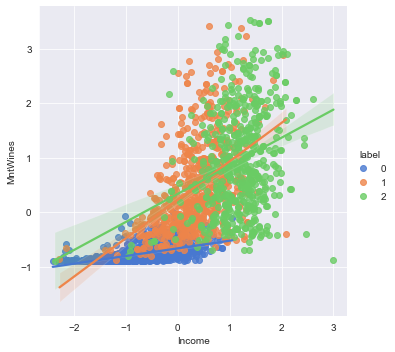

In [131]:
sns.set_palette("muted")
sns.lmplot('Income','MntWines',data=dums,hue='label')

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



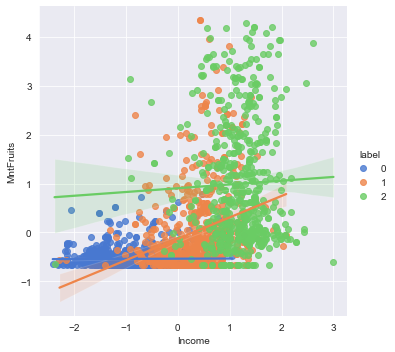

In [133]:
sns.set_palette("muted")
sns.lmplot('Income','MntFruits',data=dums,hue='label')

<span style='background-color:#fffb51'>Income과 갖가지 구매수.. 제법 군집화가 잘 되어보임!</span>  

In [134]:
# 부모여부에 따른 클래스 분포

tb2 = pd.crosstab(dums.Is_Parent, dums.label)
tb2

label        0    1    2
Is_Parent               
0          126   27  475
1          897  608   72

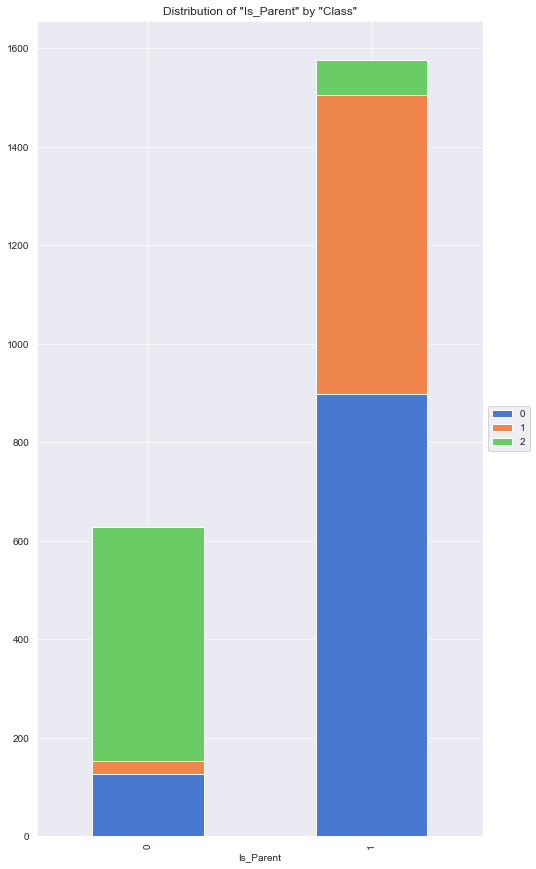

<Figure size 216x360 with 0 Axes>

In [141]:
ax = tb2.plot(kind='bar', stacked=True)
plt.title('Distribution of "Is_Parent" by "Class"')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(3,5))

plt.show()

<span style='background-color:#fffb51'>자식이 없으면 클래스2인 경우가 대다수고, 자식이 있는 경우는 클래스 1,0</span>  


/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



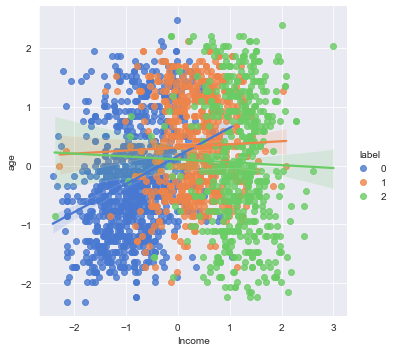

In [142]:
sns.set_palette("muted")
sns.lmplot('Income','age',data=dums,hue='label')

# 예측결과

1) 군집의 성격이 잘 드러나는지  --> <span style='background-color:#fffb51'>소득별,구매수별로 군집화가 비교적 깔끔하게 됨</span>  
2) 드러난 군집의 특징이 마케팅 등에 활용하기에 적합한지   
   --> <span style='background-color:#fffb51'>수입/소비적인 측면은 소비자의 성향에 굉장히 중요한 특성이므로, 이를 잘 반영하여 군집시킨 해당 모델은 마케팅에 활용하기에 적합하다고 생각함.</span>  

비즈니스적인 의사결정 중심으로 클러스터 개수가 정해짐 